In [1]:
from kndetect.plot_lightcurve import plot_light_curve
import matplotlib.pyplot as plt

In [2]:
import os 
import numpy as np
import pandas as pd
import pickle 
from astropy.table import Table

In [3]:
train_data_head_path = '/sps/lsst/users/bbiswas/data/kilonova_datasets/train_final_master_HEAD.FITS'
train_data_phot_path = '/sps/lsst/users/bbiswas/data/kilonova_datasets/train_final_master_PHOT.FITS'
test_data_head_path = '/sps/lsst/users/bbiswas/data/kilonova_datasets/test_final_master_HEAD.FITS'
test_data_phot_path = '/sps/lsst/users/bbiswas/data/kilonova_datasets/test_final_master_PHOT.FITS'

In [4]:
from kndetect.utils import get_data_dir_path, load_pcs
data_dir = get_data_dir_path()

In [5]:
df_header = Table.read(train_data_head_path, format='fits').to_pandas()
df_phot = Table.read(train_data_phot_path, format='fits').to_pandas()

In [6]:
df_header_test = Table.read(test_data_head_path, format='fits').to_pandas()
df_phot_test = Table.read(test_data_phot_path, format='fits').to_pandas()

In [7]:
sub_directory = "partial"
flux_lim =200

In [8]:
train_features_df = pd.read_csv(os.path.join(data_dir, sub_directory, "train_features.csv"),index_col=0)

In [9]:
def get_band_coeff_dict(features):
    band_coeff_dict = {}
    for band in ['g', 'r']:
        coeffs =[]
        for pc_num in range(3):
            coeffs.append(features["coeff" + str(pc_num+1) + "_" + band])
            
        if band == 'g':
            band_coeff_dict[b'g'] = coeffs
        else:
            band_coeff_dict[b'r'] = coeffs
    return band_coeff_dict

          SNID  SNTYPE SUBSURVEY     IAUC  FAKE        RA  PIXSIZE  NXPIX  \
10966  3347880     151      b' '  b'NULL'     2  4.383388      1.0     -9   

       NYPIX  CCDNUM  ...  SIM_MWEBV   SIM_PEAKMJD  SIM_MAGSMEAR_COH   SIM_AV  \
10966     -9       0  ...    0.02057  57501.402344               0.0  0.03686   

       SIM_RV  SIM_PEAKMAG_g  SIM_PEAKMAG_r  SIM_EXPOSURE_g  SIM_EXPOSURE_r  \
10966     3.1      17.623735      17.990177             1.0             1.0   

       SIM_SUBSAMPLE_INDEX  
10966                   -9  

[1 rows x 60 columns]
57506.4548
[0.8968034459481385, 0.1970147220512817, 0.0091034499027524]
[0.9263872997297662, 0.1604691823424509, 0.0244338214197837]


/pbs/throng/lsst/users/bbiswas/kndetect/kndetect/plot_lightcurve.py:105: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax.errorbar(


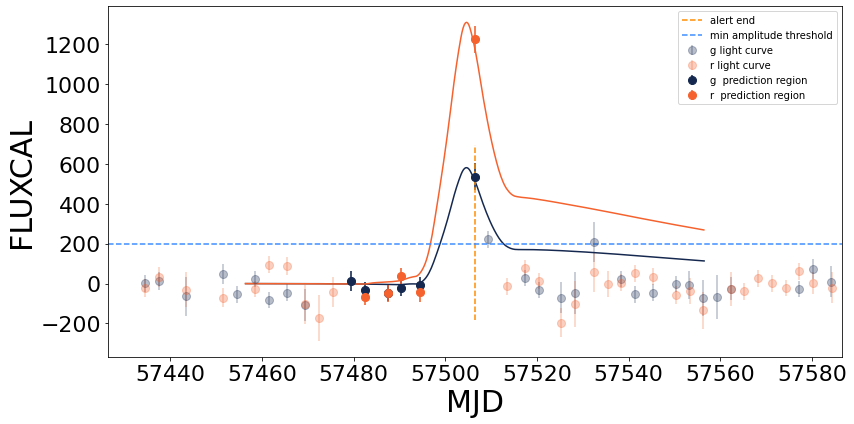

In [11]:
from kndetect.plot_lightcurve import plot_predicted_bands
color_band_dict = {b'g': '#15284F', b'r': '#F5622E'}
count = 0
for _, object_features in train_features_df.iterrows():
    snid = object_features["key"]
    #print(object_features)
    if snid == 3347880:
        object_lc = df_phot[df_phot["SNID"]==snid]
        print(df_header[df_header["SNID"]==snid])
        band_coeff_dict = get_band_coeff_dict(object_features)
        plot_predicted_bands(lc=object_lc, all_band_coeff_dict=band_coeff_dict, features=object_features, color_band_dict=color_band_dict, flux_lim=flux_lim, pcs=load_pcs(), band_map={b'r': 'r',b'g':'g'}, duration=30)
        plt.show()
        plt.close()
    count+=1
    # if count==20:
    #     break

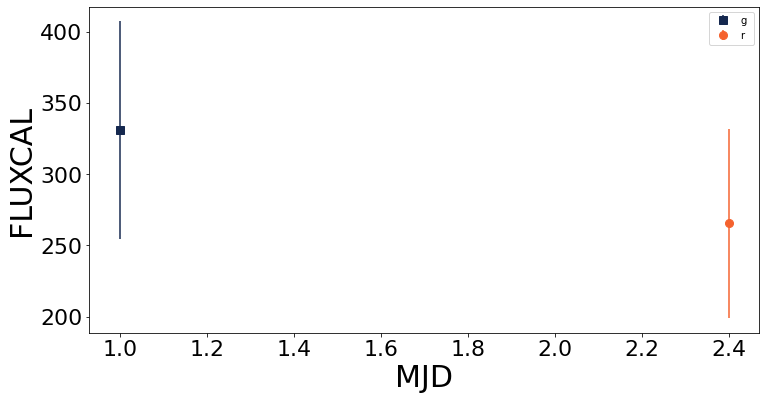

In [12]:

for object_id in df_header['SNID'].values:
    lc = df_phot[df_phot['SNID'] == object_id]
    plot_light_curve(lc=lc, color_band_dict=color_band_dict, bands=[b'g', b'r'], band_map={b'r': 'r',b'g':'g'}, markers={b'r': 'o',b'g':'s'})
    plt.show()
    break

In [14]:
sub_directory = "complete"
flux_lim =200

In [15]:
complete_features_df = pd.read_csv(os.path.join(data_dir, sub_directory, "train_features.csv"),index_col=0)

          SNID  SNTYPE SUBSURVEY     IAUC  FAKE        RA  PIXSIZE  NXPIX  \
10966  3347880     151      b' '  b'NULL'     2  4.383388      1.0     -9   

       NYPIX  CCDNUM  ...  SIM_MWEBV   SIM_PEAKMJD  SIM_MAGSMEAR_COH   SIM_AV  \
10966     -9       0  ...    0.02057  57501.402344               0.0  0.03686   

       SIM_RV  SIM_PEAKMAG_g  SIM_PEAKMAG_r  SIM_EXPOSURE_g  SIM_EXPOSURE_r  \
10966     3.1      17.623735      17.990177             1.0             1.0   

       SIM_SUBSAMPLE_INDEX  
10966                   -9  

[1 rows x 60 columns]
[0.6147307522610407, 0.2494158020673585, -0.3710357175149711]
[0.5344827290191522, 0.2468082074880015, -0.2978046259406833]


/pbs/throng/lsst/users/bbiswas/kndetect/kndetect/plot_lightcurve.py:105: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "." (-> marker='.'). The keyword argument will take precedence.
  ax.errorbar(


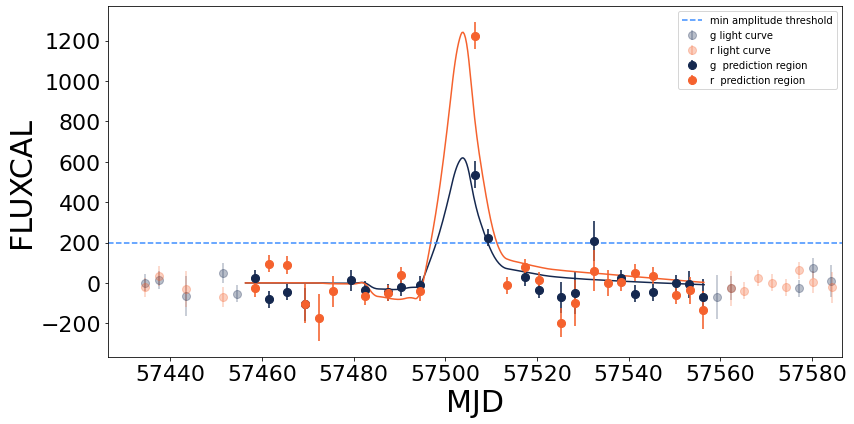

In [16]:
color_band_dict = {b'g': '#15284F', b'r': '#F5622E'}
count = 0
for _, object_features in complete_features_df.iterrows():
    snid = object_features["key"]
    #print(object_features)
    if snid == 3347880:
        object_lc = df_phot[df_phot["SNID"]==snid]
        print(df_header[df_header["SNID"]==snid])
        band_coeff_dict = get_band_coeff_dict(object_features)
        plot_predicted_bands(lc=object_lc, all_band_coeff_dict=band_coeff_dict, features=object_features, color_band_dict=color_band_dict, flux_lim=flux_lim, pcs=load_pcs(), band_map={b'r': 'r',b'g':'g'}, duration=30)
        plt.show()
        plt.close()
    count+=1